In [1]:
# from tensorflow.keras.models import
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import os
import glob
import numpy as np
import pandas as pd
import cv2 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [29]:
print(train_images.shape)
trian_images = np.concatenate([train_images, train_images_2])
print(train_images.shape)

(9000, 256, 256)
(9000, 256, 256)


In [24]:
train_images_2.shape

(1000, 256, 256)

In [13]:
class DL:
    def __init__(self):
        
        return
    
    def train_data(self, labelfile, imagefolder, pixel_size):
        
        global train_labels, train_images, img, img1
        
        # train_labels分資料  DM給的係數 12項(原14項)
        train_label = []
        labels = pd.read_csv(labelfile, header=None)
        labels = labels.loc[:8999, :]
#         labels_2 = pd.read_csv('0420 random single 1000data SHWS coefficient.csv', header = None)
#         labels = pd.concat([labels, labels_2])

#         labels = labels.drop([10, 13], axis = 1) # 刪除第、行
        train_labels = np.array(labels)
#         for label in labels:
#                     for i in range(0,5):
#                         train_label.append(label)
#         train_labels = np.array(train_label)
#         train_labels -= np.mean(train_labels)
#         train_labels /= np.std(train_labels)
#         train_labels = np.asarray(train_labels).astype(np.float32)


        # train_images分資料
        starttime = int(time.time())
        train_images = []
        image_list = os.listdir(imagefolder + '/')
        image_list.sort(key = lambda x: int(x[:])) # 排序，不然順序會跑掉

        for i in range(9000):
            for images in glob.glob(imagefolder + '/' + image_list[i] + '/1.bmp'):
                img = cv2.imread(images) # 圖片讀檔
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                img1 = cv2.resize(img, (pixel_size, pixel_size)) # 將Pixels從2048 * 2048 resize 成512 * 512
                train_images.append(img1)
                
#         train_images_2 = []        
#         image_list_2 = os.listdir('230420 random single 1000data/')
#         image_list_2.sort(key = lambda x: int(x[:])) # 排序，不然順序會跑掉

#         for i in range(1000):
#             for images in glob.glob('230420 random single 1000data/' + image_list_2[i] + '/1.bmp'):
#                 img = cv2.imread(images) # 圖片讀檔
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
#                 img1 = cv2.resize(img, (pixel_size, pixel_size)) # 將Pixels從2048 * 2048 resize 成512 * 512
#                 train_images_2.append(img1)
        
        train_images = np.array(train_images) # 轉成ndarray
#         train_images_2 = np.array(train_images_2) # 轉成ndarray
#         trian_images = np.vstack((train_images, train_images_2))
        train_images = np.asarray(train_images).astype(np.float32)
        endtime = int(time.time())
        print('train_images花了',endtime-starttime,'s')
        print('train_images(Rows,columns):',train_images.shape)
        print('train_labels(Rows,columns):',train_labels.shape)
        
        return img, img1, train_labels, train_images
    
    def test_data(self, labelfile, imagefolder, pixel_size):
        
        global test_labels, test_images, img, img1
        
        # test_labels分資料  DM給的係數 12項(原14項)
        test_label = []
        labels = pd.read_csv(labelfile, header=None)
        labels = labels.loc[9000:9999, :]
        test_labels = np.array(labels)
#         for label in labels:
#                     for i in range(0,5):
#                         test_label.append(label)
#         test_labels = np.array(test_label)
#         labels = labels.drop([10, 13], axis = 1) # 刪除第、行
#         test_labels -= np.mean(test_labels)
#         test_labels /= np.std(test_labels)


        # test_images分資料
        starttime = int(time.time())
        test_images = []
        image_list = os.listdir(imagefolder + '/')
        image_list.sort(key = lambda x: int(x[:]))

        for i in range(1000):
            for images in glob.glob(imagefolder + '/' + image_list[i+9000] + '/1.bmp'):
                img = cv2.imread(images) # 圖片讀檔
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                img1 = cv2.resize(img,(pixel_size, pixel_size)) # 將Pixels從2048 * 2048 resize 成512 * 512
                test_images.append(img1)

        test_images = np.array(test_images) # 轉成ndarray
        test_images = np.asarray(test_images).astype(np.float32)
        endtime = int(time.time())
        print('test_images花了',endtime-starttime,'s')
        print('test_images(Rows,columns):',test_images.shape)
        print('test_labels(Rows,columns):',test_labels.shape)
        
        return img, img1, test_labels, test_images
    
    def im_show(self):
        plt.imshow(img1, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
        plt.show()
        
    def model_fit(self, val_split, epochs, batch_size, load = 0):
        global AO_model
        AO_model = model.fit(train_images, train_labels,validation_split=val_split,verbose=1, epochs=epochs, batch_size=batch_size)
        
        return AO_model
        
    def loss(self): # 畫loss圖
        plt.plot(AO_model.history['loss'],label='loss')
        plt.plot(AO_model.history['val_loss'],label='val')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.legend(['Train', 'validation'], loc='upper right')
        plt.show()
    
    def multi_train_graph(self, j):
        x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
        labels = ["Z1","Z2","Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11", "Z12", "Z13", "Z14", "Z15"]
        plt.figure(figsize=(20, 20))

        for i in range(1,17):
            plt.subplot(4,4,i)
            plt.bar(x, model.predict(train_images[[i+j]]).flatten(), tick_label = labels)
#             plt.bar(x, train_labels[[i+j]].flatten(), tick_label = labels,width=0.5)
            plt.legend(['predict', 'truth'], loc='upper right',fontsize=10)
    def multi_test_graph(self, j):
        x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
        labels = ["Z1","Z2","Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11", "Z12", "Z13", "Z14", "Z15"]
        plt.figure(figsize=(20, 20))

        for i in range(1,17):
            plt.subplot(4,4,i)
            plt.bar(x,(model.predict(test_images[[i+j]]).flatten())*10, tick_label = labels)
            plt.bar(x, test_labels[[i+j]].flatten(), tick_label = labels,width=0.5)
            plt.legend(['predict', 'truth'], loc='upper right',fontsize=10)
            
    def single_graph(self,i):
        x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
        labels = ["Z1","Z2","Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11", "Z12", "Z13", "Z14", "Z15"]
        plt.figure(figsize=(20, 20))
        plt.bar(x, model.predict(test_images[[i]]).flatten(), tick_label = labels )
        plt.bar(x, test_labels[[i]].flatten(), tick_label = labels, width=0.5 )
        plt.legend(['predict', 'truth'], loc='upper right',fontsize=10)

    def save_data(self, modelname): # 儲存數據至設定資料夾，可拿去給Matlab畫圖
        folder = modelname
        os.mkdir('light_point_'+ folder)            # 創建資料夾
        model.save('./light_point_'+ folder + '/' + modelname + '.h5') # 模型儲存

        pd.DataFrame(AO_model.history['loss']).to_csv('light_point_'+ folder + '/loss.csv', index = False)          # 儲存loss
        pd.DataFrame(AO_model.history['val_loss']).to_csv('light_point_'+ folder + '/val_loss.csv', index = False)  # 儲存val_loss
        pd.DataFrame(model.predict(test_images)).to_csv('light_point_'+ folder + '/predict.csv', index = False)     # 儲存predict
        pd.DataFrame(test_labels).to_csv('light_point_'+ folder + '/test_labels.csv', index = False)                # 儲存labels
    
    def load_model(self, folder): # 讀取儲存的模型
        global load_model
        load_model = tf.keras.models.load_model('./'+ folder + '/' + folder + '.h5')
        print(load_model.summary())
        
        return load_model
DL = DL()

In [4]:
DL.train_data(labelfile = '0420 10000data DM coefficient(z1,z2).csv',imagefolder = 'light_point_v20230421', pixel_size=512)

train_images花了 161 s
train_images(Rows,columns): (9000, 512, 512)
train_labels(Rows,columns): (9000, 14)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[-0.45,  0.25, -0.91, ..., -0.27, -0.95,  1.  ],
        [ 0.36, -0.59, -0.57, ..., -0.75, -0.21,  0.78],
        [-0.27,  0.94,  0.79, ..., -0.23, -0.68, -0.8 ],
        ...,
        [ 0.34,  0.  ,  0.96, ..., -0.89,  0.12, -0.93],
        [ 0.93, -0.3 , -0.3 , ...,  0.91,  0.3 ,  0.27],
        [ 0.01, -0.06,  0.99, ..., -0.52,  0.37,  0.41]]),
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0.,

In [5]:
DL.test_data(labelfile = '0420 10000data DM coefficient(z1,z2).csv',imagefolder = 'light_point_v20230421', pixel_size=512)

test_images花了 19 s
test_images(Rows,columns): (1000, 512, 512)
test_labels(Rows,columns): (1000, 14)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 0.06, -0.4 ,  0.2 , ...,  0.73, -0.68, -0.44],
        [-0.4 , -0.22,  0.91, ..., -0.25,  0.3 , -0.18],
        [-0.62, -0.68,  0.96, ..., -0.06,  0.21, -0.99],
        ...,
        [-0.15, -0.53,  0.41, ...,  0.55,  0.04,  0.36],
        [ 0.26, -0.01,  0.38, ...,  0.28, -0.22, -0.01],
        [ 0.08, -0.13,  0.16, ...,  0.49, -0.41,  0.07]]),
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0.,

In [64]:
test_images[[8]]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [11]:
# create_model

global model
model = Sequential()

model.add(Conv2D(input_shape=(512,512, 1),activation='relu', filters=32,kernel_size=(5, 5),strides=(1, 1)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(filters=32,activation='relu',kernel_size=(5, 5),strides=(1, 1)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3, 3),strides=(1, 1)))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3, 3),strides=(1, 1)))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3, 3),strides=(1, 1)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3, 3),strides=(1, 1)))
model.add(GlobalAveragePooling2D())

model.add(Dense(512))
model.add(Dense(512))
model.add(Dense(14, activation='linear'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay( 
     initial_learning_rate=1e-5, # 初始學習率
     decay_steps=10000, # 衰減迭代次數
     decay_rate=0.96)

optimizer = tf.optimizers.Adam(
    learning_rate=lr_schedule)

model.compile(optimizer = optimizer,
            loss = 'mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 508, 508, 32)      832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 169, 169, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 165, 165, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 51, 51, 64)       

In [14]:
# DL = DL()
AO_model = model.fit(train_images, train_labels,validation_split=.2, epochs=20, batch_size=4)

Epoch 1/20
1800/1800 [==============================] - 465s 259ms/step - loss: 0.3139 - val_loss: 0.3144
Epoch 2/20
1800/1800 [==============================] - 449s 249ms/step - loss: 0.3135 - val_loss: 0.3139
Epoch 3/20
1800/1800 [==============================] - 452s 251ms/step - loss: 0.3133 - val_loss: 0.3143
Epoch 4/20
1800/1800 [==============================] - 449s 250ms/step - loss: 0.3131 - val_loss: 0.3141
Epoch 5/20
1800/1800 [==============================] - 459s 255ms/step - loss: 0.3131 - val_loss: 0.3139
Epoch 6/20
1800/1800 [==============================] - 450s 250ms/step - loss: 0.3131 - val_loss: 0.3139
Epoch 7/20
1800/1800 [==============================] - 450s 250ms/step - loss: 0.3130 - val_loss: 0.3139
Epoch 8/20
1800/1800 [==============================] - 458s 254ms/step - loss: 0.3130 - val_loss: 0.3139
Epoch 9/20
1800/1800 [==============================] - 449s 249ms/step - loss: 0.3130 - val_loss: 0.3139
Epoch 10/20
1800/1800 [=======================

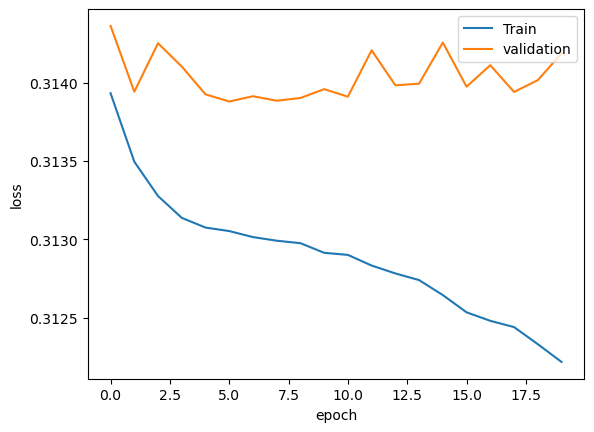

In [15]:
DL.loss()

1/1 [==============================] - 0s 26ms/step


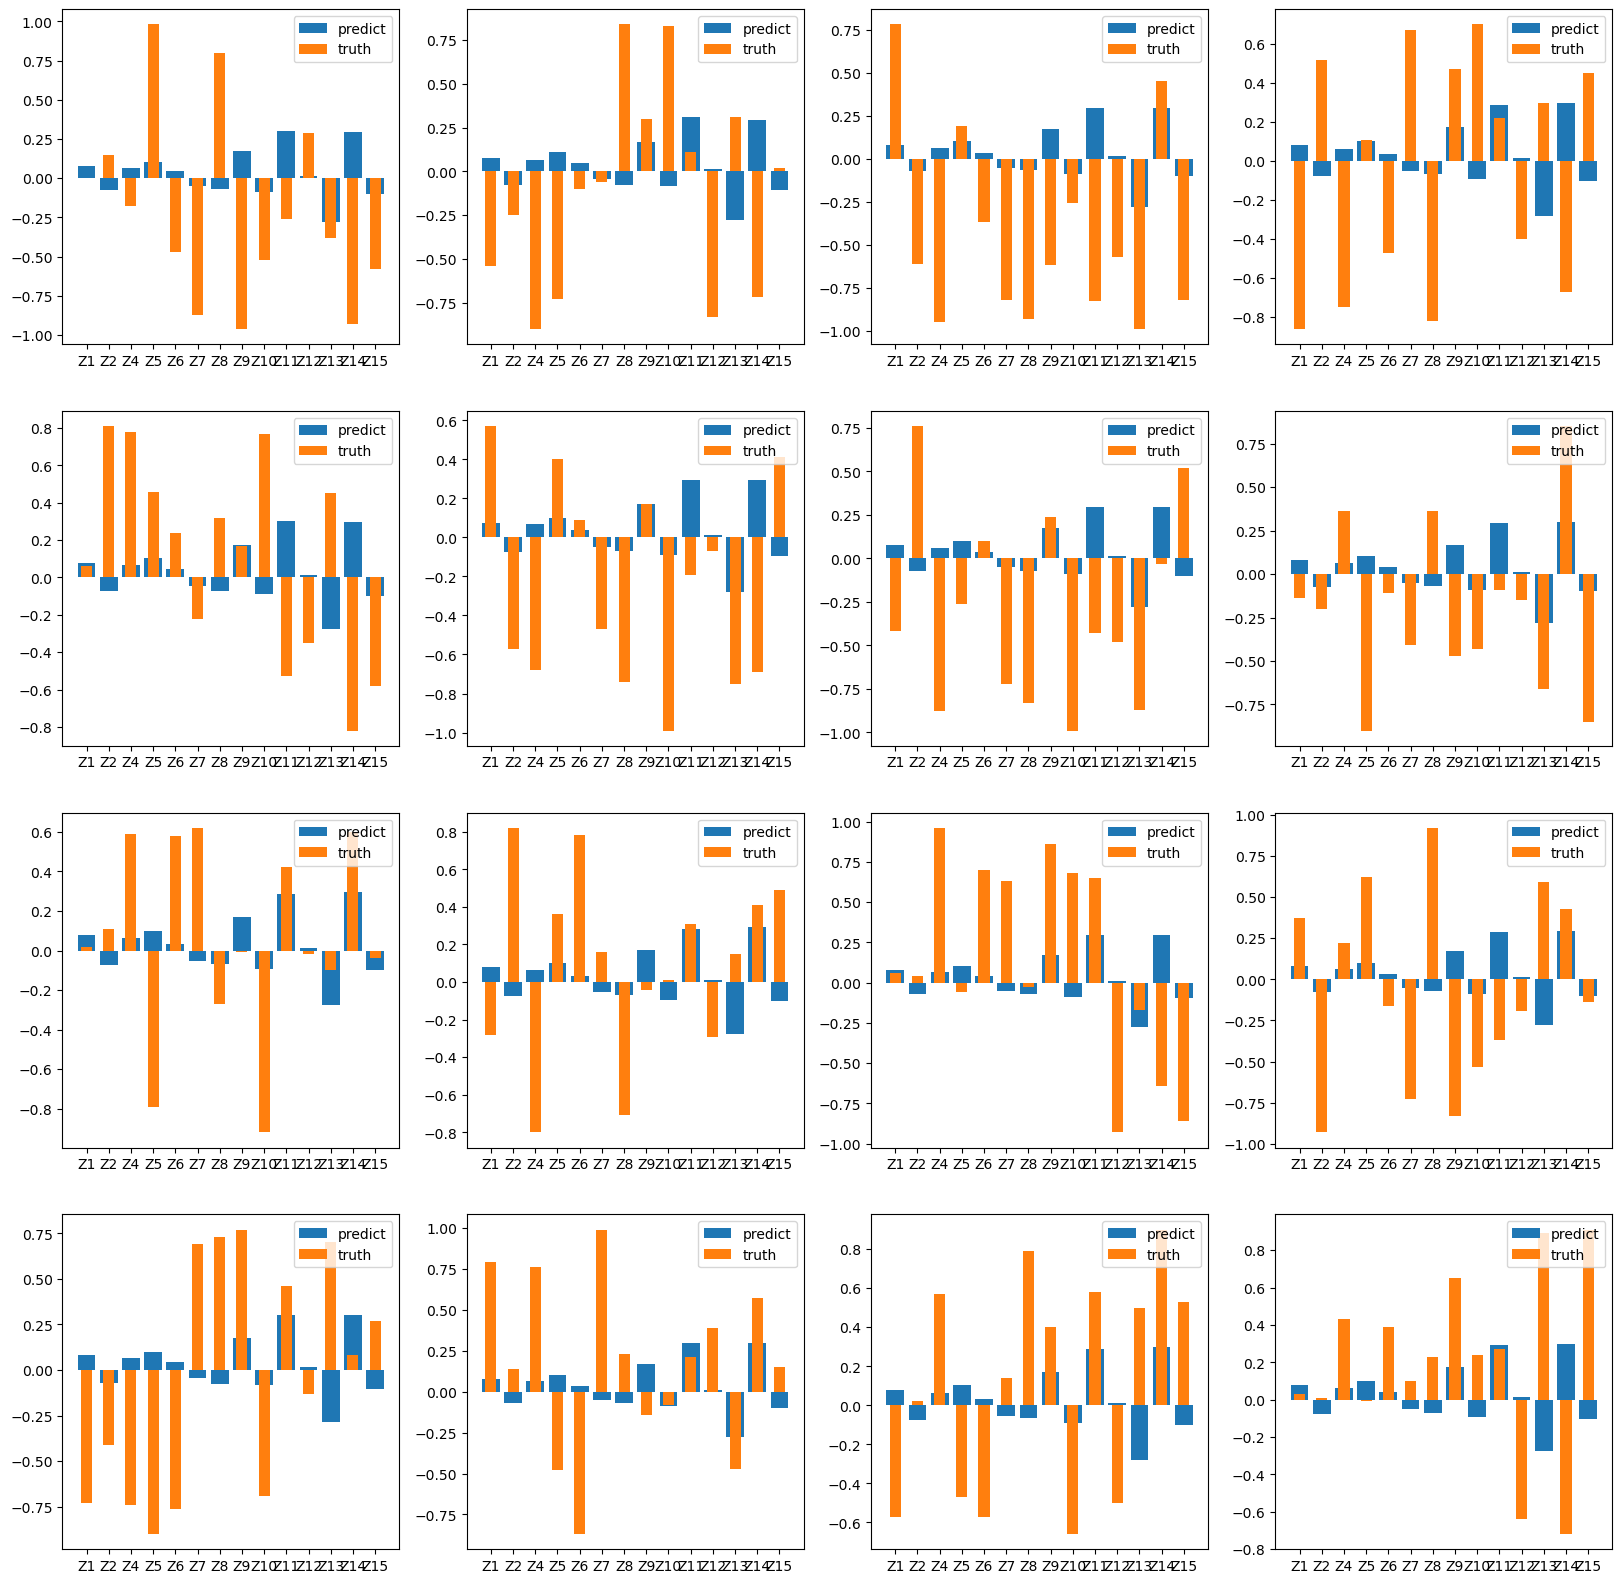

In [10]:
DL.multi_test_graph(0+16+16+16+16+16+16+16)

1/1 [==============================] - 0s 23ms/step


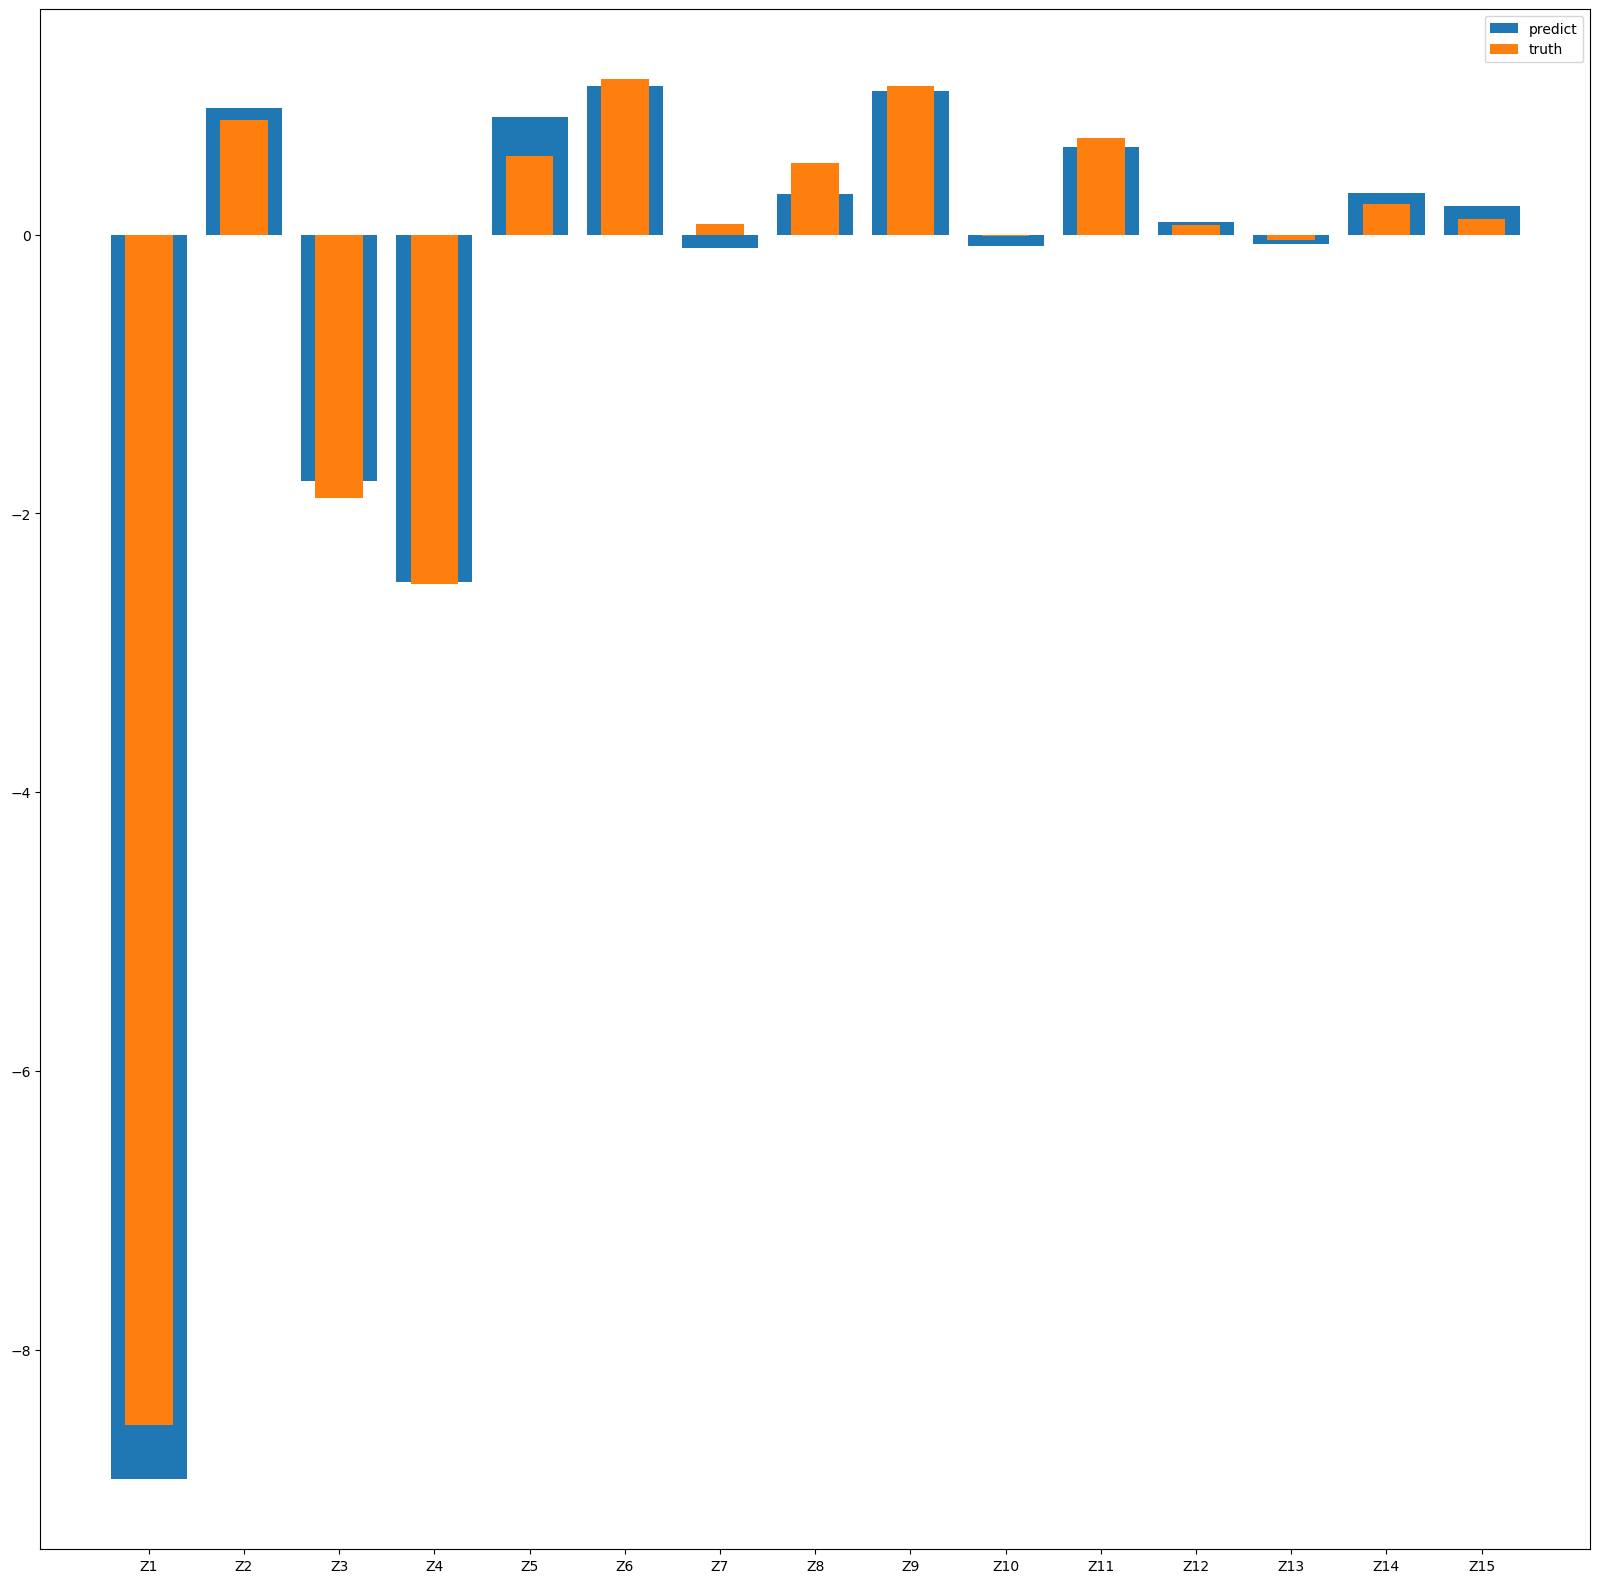

In [17]:
DL.single_graph(142)

In [10]:
DL.save_data(modelname = 'AO_best')

32/32 [==============================] - 9s 275ms/step


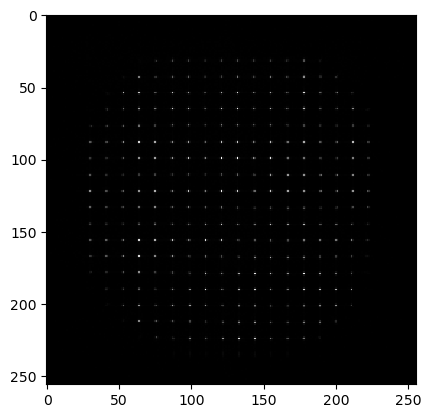

In [35]:
DL.im_show()

In [4]:
DL.load_model('AO_best')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 255, 255, 16)      160       
                                                                 
 conv2d_81 (Conv2D)          (None, 127, 127, 16)      2320      
                                                                 
 conv2d_82 (Conv2D)          (None, 63, 63, 16)        2320      
                                                                 
 conv2d_83 (Conv2D)          (None, 31, 31, 16)        2320      
                                                                 
 conv2d_84 (Conv2D)          (None, 15, 15, 16)        2320      
                                                                 
 conv2d_85 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 flatten_14 (Flatten)        (None, 784)             